In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

### data extraction of a product from e-commerce web site

In [2]:
url='https://www.amazon.com/dp/B089DR29T6?tag=spycom00-20&linkCode=ogi&th=1&language=en_US&asc_source=amp&asc_campaign=amp&asc_refurl=https%3A%2F%2Fspy.com%2Farticles%2Fhacks%2Fhome-hacks%2Fproducts-with-a-lot-of-amazon-reviews-1202878499%2F'

In [3]:
data=requests.get(url)#getting source code from url

In [4]:
data

<Response [200]>

b'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-na.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- 
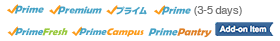

In [5]:
data.content#displaying the contents

In [6]:
soup=bs(data.content,'html.parser')#displaying in html format

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-na.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--
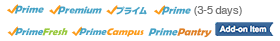

In [7]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link crossorigin="" href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://images-na.ssl-images-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="preconnect"
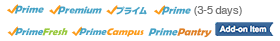

In [8]:
print(soup.prettify())#displaying in a better way

## finding customer names

In [9]:
cust_name=soup.findAll("span",class_="a-profile-name")

In [10]:
cust_name

[<span class="a-profile-name">REVIEW Amazon Smart Plug works with Alexa Love It!</span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name"></span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Michalia Humphrey<span class="a-icon a-profile-verified-badge"><span class="a-profile-verified-text"></span></span></span>,
 <span class="a-profile-name">Alley</span>,
 <span class="a-profile-name">Diana<span class="a-icon a-profile-verified-badge"><span class="a-profile-verified-text"></span></span></span>,
 <span class="a-profile-name">Diana</span>,
 <span class="a-profile-name">nm</span>,
 <span class="a-profile-name">Alexander Jo

In [11]:
len(cust_name)

18

In [12]:
for i in range(0,12):
    cust_name.pop(0)

In [13]:
cust_name

[<span class="a-profile-name">Michalia Humphrey<span class="a-icon a-profile-verified-badge"><span class="a-profile-verified-text"></span></span></span>,
 <span class="a-profile-name">Alley</span>,
 <span class="a-profile-name">Diana<span class="a-icon a-profile-verified-badge"><span class="a-profile-verified-text"></span></span></span>,
 <span class="a-profile-name">Diana</span>,
 <span class="a-profile-name">nm</span>,
 <span class="a-profile-name">Alexander Johnson</span>]

In [14]:
cust_name1=[]
for i in range(0,len(cust_name)):
    cust_name1.append(cust_name[i].get_text())
cust_name1

['Michalia Humphrey', 'Alley', 'Diana', 'Diana', 'nm', 'Alexander Johnson']

In [15]:
cust_name1.pop(2)

'Diana'

In [16]:
col=['customer_name']
df=pd.DataFrame(cust_name1,columns=col)
df

customer_name
0  Michalia Humphrey
1              Alley
2              Diana
3                 nm
4  Alexander Johnson

In [17]:
rev_head=soup.findAll('a',class_='review-title')
rev_head

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RT5R74ZO00PE9?ASIN=B089DR29T6"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span>
 <span>Effortless Smart Home Upgrade - Amazon Smart Plug</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R54THRW6FNNAW?ASIN=B089DR29T6"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span>
 <span>A Game-Changer for Home Automation</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1W6AMBVF9GXW6

## finding the customer review

In [42]:
rev_rating=[]
for i in range(0,len(rev_head)):
    rev_rating.append(rev_head[i].get_text())
rev_rating

['5.0 out of 5 stars\nEffortless Smart Home Upgrade - Amazon Smart Plug\n',
 '5.0 out of 5 stars\nA Game-Changer for Home Automation\n',
 '5.0 out of 5 stars\nGreat smart plug to go with echo!\n',
 '5.0 out of 5 stars\nEasy setup and works great\n',
 '4.0 out of 5 stars\nA little big, but works great!\n']

In [45]:
stri=[' \nEffortless Smart Home Upgrade - Amazon Smart Plug\n',' \nA Game-Changer for Home Automation\n',' \nGreat smart plug to go with echo!',' \nEasy setup and work',' \nEasy Setup but it has limitati','\nA little big, but works great!\n']

In [46]:

for i in stri:
    rev_rating[:]=[titles.rstrip( i ) for titles in rev_rating]
rev_rating

['5.0 out of 5',
 '5.0 out of 5',
 '5.0 out of 5',
 '5.0 out of 5',
 '4.0 out of 5']

## finding the review title

In [47]:
rev_title=[]
for i in range(0,len(rev_head)):
    rev_title.append(rev_head[i].get_text())
rev_title

['5.0 out of 5 stars\nEffortless Smart Home Upgrade - Amazon Smart Plug\n',
 '5.0 out of 5 stars\nA Game-Changer for Home Automation\n',
 '5.0 out of 5 stars\nGreat smart plug to go with echo!\n',
 '5.0 out of 5 stars\nEasy setup and works great\n',
 '4.0 out of 5 stars\nA little big, but works great!\n']

In [48]:
rev_title[:]=[x.lstrip('5.0 out of 5 stars\n') for x in rev_title]
rev_title[:]=[x.lstrip('4.0 out of 5 stars\n') for x in rev_title]
rev_title

['Effortless Smart Home Upgrade - Amazon Smart Plug\n',
 'A Game-Changer for Home Automation\n',
 'Great smart plug to go with echo!\n',
 'Easy setup and works great\n',
 'A little big, but works great!\n']

In [49]:
rev_title[:]=[x.rstrip('\n') for x in rev_title]
rev_title

['Effortless Smart Home Upgrade - Amazon Smart Plug',
 'A Game-Changer for Home Automation',
 'Great smart plug to go with echo!',
 'Easy setup and works great',
 'A little big, but works great!']

In [50]:
df['Customer_Rating']=rev_rating
df['Review_Title']=rev_title
df

customer_name Customer_Rating  \
0  Michalia Humphrey    5.0 out of 5   
1              Alley    5.0 out of 5   
2              Diana    5.0 out of 5   
3                 nm    5.0 out of 5   
4  Alexander Johnson    4.0 out of 5   

                                        Review_Title  
0  Effortless Smart Home Upgrade - Amazon Smart Plug  
1                 A Game-Changer for Home Automation  
2                  Great smart plug to go with echo!  
3                         Easy setup and works great  
4                     A little big, but works great!

## finding the reviews

In [51]:
cust_review=soup.findAll('div',class_='review-text-content')
cust_review

[<div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
 <span>I recently added the Amazon Smart Plug to my home, and it's been a game-changer in simplifying my smart home setup. Here's why I love it:<br><br>Voice-Controlled Convenience:<br/>The ability to control lights with just my voice is a game-changer. It integrates seamlessly with Alexa, allowing me to effortlessly manage my home's lighting with simple voice commands.<br/><br/>Easy Setup:<br/>Setting up the Amazon Smart Plug was a breeze. The step-by-step instructions were clear, and I had it up and running within minutes. No complicated processes or technical hiccups – just plug, connect, and you're good to go!<br/><br/>Flawless Integration with Echo:<br/>I use it in conjunction with my Echo, and the integration is flawless. The two devices work seamlessly together, creating a truly hands-free experience. Whether I'm in the mood for 

In [52]:
cust_review1=[]
for i in range(0,len(cust_review)):
    cust_review1.append(cust_review[i].get_text())
cust_review1

["\nI recently added the Amazon Smart Plug to my home, and it's been a game-changer in simplifying my smart home setup. Here's why I love it:Voice-Controlled Convenience:The ability to control lights with just my voice is a game-changer. It integrates seamlessly with Alexa, allowing me to effortlessly manage my home's lighting with simple voice commands.Easy Setup:Setting up the Amazon Smart Plug was a breeze. The step-by-step instructions were clear, and I had it up and running within minutes. No complicated processes or technical hiccups – just plug, connect, and you're good to go!Flawless Integration with Echo:I use it in conjunction with my Echo, and the integration is flawless. The two devices work seamlessly together, creating a truly hands-free experience. Whether I'm in the mood for a cozy evening or need a well-lit workspace, a simple command to Alexa does the trick.Reliable Performance:The Amazon Smart Plug has proven to be reliable. It responds promptly to commands, and I ha

In [53]:
cust_review1[:]=[x.lstrip('\n') for x in cust_review1]
cust_review1[:]=[x.rstrip('\n') for x in cust_review1]
cust_review1

["I recently added the Amazon Smart Plug to my home, and it's been a game-changer in simplifying my smart home setup. Here's why I love it:Voice-Controlled Convenience:The ability to control lights with just my voice is a game-changer. It integrates seamlessly with Alexa, allowing me to effortlessly manage my home's lighting with simple voice commands.Easy Setup:Setting up the Amazon Smart Plug was a breeze. The step-by-step instructions were clear, and I had it up and running within minutes. No complicated processes or technical hiccups – just plug, connect, and you're good to go!Flawless Integration with Echo:I use it in conjunction with my Echo, and the integration is flawless. The two devices work seamlessly together, creating a truly hands-free experience. Whether I'm in the mood for a cozy evening or need a well-lit workspace, a simple command to Alexa does the trick.Reliable Performance:The Amazon Smart Plug has proven to be reliable. It responds promptly to commands, and I have

In [54]:
df['Customer_review']=cust_review1
df

customer_name Customer_Rating  \
0  Michalia Humphrey    5.0 out of 5   
1              Alley    5.0 out of 5   
2              Diana    5.0 out of 5   
3                 nm    5.0 out of 5   
4  Alexander Johnson    4.0 out of 5   

                                        Review_Title  \
0  Effortless Smart Home Upgrade - Amazon Smart Plug   
1                 A Game-Changer for Home Automation   
2                  Great smart plug to go with echo!   
3                         Easy setup and works great   
4                     A little big, but works great!   

                                     Customer_review  
0  I recently added the Amazon Smart Plug to my h...  
1  I have to say, the Amazon Smart Plug has truly...  
2  So I’m kind of new to the amazon device family...  
3  I ordered 6 of these plugs to operate the lamp...  
4  This works great and makes it a lot easier to ...

In [55]:
review=df[['Customer_review']]
review

Customer_review
0  I recently added the Amazon Smart Plug to my h...
1  I have to say, the Amazon Smart Plug has truly...
2  So I’m kind of new to the amazon device family...
3  I ordered 6 of these plugs to operate the lamp...
4  This works great and makes it a lot easier to ...

In [56]:
review1=[x.strip() for x in review.Customer_review]

In [57]:
review1=[x for x in review1 if x]

In [58]:
review1

["I recently added the Amazon Smart Plug to my home, and it's been a game-changer in simplifying my smart home setup. Here's why I love it:Voice-Controlled Convenience:The ability to control lights with just my voice is a game-changer. It integrates seamlessly with Alexa, allowing me to effortlessly manage my home's lighting with simple voice commands.Easy Setup:Setting up the Amazon Smart Plug was a breeze. The step-by-step instructions were clear, and I had it up and running within minutes. No complicated processes or technical hiccups – just plug, connect, and you're good to go!Flawless Integration with Echo:I use it in conjunction with my Echo, and the integration is flawless. The two devices work seamlessly together, creating a truly hands-free experience. Whether I'm in the mood for a cozy evening or need a well-lit workspace, a simple command to Alexa does the trick.Reliable Performance:The Amazon Smart Plug has proven to be reliable. It responds promptly to commands, and I have

In [59]:
join_reviews=' '.join(review1)
join_reviews

'I recently added the Amazon Smart Plug to my home, and it\'s been a game-changer in simplifying my smart home setup. Here\'s why I love it:Voice-Controlled Convenience:The ability to control lights with just my voice is a game-changer. It integrates seamlessly with Alexa, allowing me to effortlessly manage my home\'s lighting with simple voice commands.Easy Setup:Setting up the Amazon Smart Plug was a breeze. The step-by-step instructions were clear, and I had it up and running within minutes. No complicated processes or technical hiccups – just plug, connect, and you\'re good to go!Flawless Integration with Echo:I use it in conjunction with my Echo, and the integration is flawless. The two devices work seamlessly together, creating a truly hands-free experience. Whether I\'m in the mood for a cozy evening or need a well-lit workspace, a simple command to Alexa does the trick.Reliable Performance:The Amazon Smart Plug has proven to be reliable. It responds promptly to commands, and I 

## data preprocessing/data cleaning

In [60]:
import string 

In [61]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
no_pun_review=join_reviews.translate(str.maketrans('','',string.punctuation))
no_pun_review

'I recently added the Amazon Smart Plug to my home and its been a gamechanger in simplifying my smart home setup Heres why I love itVoiceControlled ConvenienceThe ability to control lights with just my voice is a gamechanger It integrates seamlessly with Alexa allowing me to effortlessly manage my homes lighting with simple voice commandsEasy SetupSetting up the Amazon Smart Plug was a breeze The stepbystep instructions were clear and I had it up and running within minutes No complicated processes or technical hiccups – just plug connect and youre good to goFlawless Integration with EchoI use it in conjunction with my Echo and the integration is flawless The two devices work seamlessly together creating a truly handsfree experience Whether Im in the mood for a cozy evening or need a welllit workspace a simple command to Alexa does the trickReliable PerformanceThe Amazon Smart Plug has proven to be reliable It responds promptly to commands and I havent experienced any connectivity issue

In [63]:
from nltk.tokenize import word_tokenize

In [64]:
tokenized=word_tokenize(no_pun_review)
tokenized

['I',
 'recently',
 'added',
 'the',
 'Amazon',
 'Smart',
 'Plug',
 'to',
 'my',
 'home',
 'and',
 'its',
 'been',
 'a',
 'gamechanger',
 'in',
 'simplifying',
 'my',
 'smart',
 'home',
 'setup',
 'Heres',
 'why',
 'I',
 'love',
 'itVoiceControlled',
 'ConvenienceThe',
 'ability',
 'to',
 'control',
 'lights',
 'with',
 'just',
 'my',
 'voice',
 'is',
 'a',
 'gamechanger',
 'It',
 'integrates',
 'seamlessly',
 'with',
 'Alexa',
 'allowing',
 'me',
 'to',
 'effortlessly',
 'manage',
 'my',
 'homes',
 'lighting',
 'with',
 'simple',
 'voice',
 'commandsEasy',
 'SetupSetting',
 'up',
 'the',
 'Amazon',
 'Smart',
 'Plug',
 'was',
 'a',
 'breeze',
 'The',
 'stepbystep',
 'instructions',
 'were',
 'clear',
 'and',
 'I',
 'had',
 'it',
 'up',
 'and',
 'running',
 'within',
 'minutes',
 'No',
 'complicated',
 'processes',
 'or',
 'technical',
 'hiccups',
 '–',
 'just',
 'plug',
 'connect',
 'and',
 'youre',
 'good',
 'to',
 'goFlawless',
 'Integration',
 'with',
 'EchoI',
 'use',
 'it',
 'in',

In [65]:
from nltk.corpus import stopwords

In [66]:
stopwords=stopwords.words('english')

In [67]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
token_lower=[x.lower() for x in tokenized]
token_lower

['i',
 'recently',
 'added',
 'the',
 'amazon',
 'smart',
 'plug',
 'to',
 'my',
 'home',
 'and',
 'its',
 'been',
 'a',
 'gamechanger',
 'in',
 'simplifying',
 'my',
 'smart',
 'home',
 'setup',
 'heres',
 'why',
 'i',
 'love',
 'itvoicecontrolled',
 'conveniencethe',
 'ability',
 'to',
 'control',
 'lights',
 'with',
 'just',
 'my',
 'voice',
 'is',
 'a',
 'gamechanger',
 'it',
 'integrates',
 'seamlessly',
 'with',
 'alexa',
 'allowing',
 'me',
 'to',
 'effortlessly',
 'manage',
 'my',
 'homes',
 'lighting',
 'with',
 'simple',
 'voice',
 'commandseasy',
 'setupsetting',
 'up',
 'the',
 'amazon',
 'smart',
 'plug',
 'was',
 'a',
 'breeze',
 'the',
 'stepbystep',
 'instructions',
 'were',
 'clear',
 'and',
 'i',
 'had',
 'it',
 'up',
 'and',
 'running',
 'within',
 'minutes',
 'no',
 'complicated',
 'processes',
 'or',
 'technical',
 'hiccups',
 '–',
 'just',
 'plug',
 'connect',
 'and',
 'youre',
 'good',
 'to',
 'goflawless',
 'integration',
 'with',
 'echoi',
 'use',
 'it',
 'in',

In [69]:
non_stopword_review=[x for x in token_lower if x not in stopwords]
non_stopword_review

['recently',
 'added',
 'amazon',
 'smart',
 'plug',
 'home',
 'gamechanger',
 'simplifying',
 'smart',
 'home',
 'setup',
 'heres',
 'love',
 'itvoicecontrolled',
 'conveniencethe',
 'ability',
 'control',
 'lights',
 'voice',
 'gamechanger',
 'integrates',
 'seamlessly',
 'alexa',
 'allowing',
 'effortlessly',
 'manage',
 'homes',
 'lighting',
 'simple',
 'voice',
 'commandseasy',
 'setupsetting',
 'amazon',
 'smart',
 'plug',
 'breeze',
 'stepbystep',
 'instructions',
 'clear',
 'running',
 'within',
 'minutes',
 'complicated',
 'processes',
 'technical',
 'hiccups',
 '–',
 'plug',
 'connect',
 'youre',
 'good',
 'goflawless',
 'integration',
 'echoi',
 'use',
 'conjunction',
 'echo',
 'integration',
 'flawless',
 'two',
 'devices',
 'work',
 'seamlessly',
 'together',
 'creating',
 'truly',
 'handsfree',
 'experience',
 'whether',
 'im',
 'mood',
 'cozy',
 'evening',
 'need',
 'welllit',
 'workspace',
 'simple',
 'command',
 'alexa',
 'trickreliable',
 'performancethe',
 'amazon',


In [70]:
from nltk.stem import WordNetLemmatizer

In [71]:
word_net_lemmatizer=WordNetLemmatizer()

In [72]:
lemmatized=[word_net_lemmatizer.lemmatize(x) for x in non_stopword_review]
lemmatized

['recently',
 'added',
 'amazon',
 'smart',
 'plug',
 'home',
 'gamechanger',
 'simplifying',
 'smart',
 'home',
 'setup',
 'here',
 'love',
 'itvoicecontrolled',
 'conveniencethe',
 'ability',
 'control',
 'light',
 'voice',
 'gamechanger',
 'integrates',
 'seamlessly',
 'alexa',
 'allowing',
 'effortlessly',
 'manage',
 'home',
 'lighting',
 'simple',
 'voice',
 'commandseasy',
 'setupsetting',
 'amazon',
 'smart',
 'plug',
 'breeze',
 'stepbystep',
 'instruction',
 'clear',
 'running',
 'within',
 'minute',
 'complicated',
 'process',
 'technical',
 'hiccup',
 '–',
 'plug',
 'connect',
 'youre',
 'good',
 'goflawless',
 'integration',
 'echoi',
 'use',
 'conjunction',
 'echo',
 'integration',
 'flawless',
 'two',
 'device',
 'work',
 'seamlessly',
 'together',
 'creating',
 'truly',
 'handsfree',
 'experience',
 'whether',
 'im',
 'mood',
 'cozy',
 'evening',
 'need',
 'welllit',
 'workspace',
 'simple',
 'command',
 'alexa',
 'trickreliable',
 'performancethe',
 'amazon',
 'smart',

In [73]:
clean_review=' '.join(lemmatized)
clean_review

'recently added amazon smart plug home gamechanger simplifying smart home setup here love itvoicecontrolled conveniencethe ability control light voice gamechanger integrates seamlessly alexa allowing effortlessly manage home lighting simple voice commandseasy setupsetting amazon smart plug breeze stepbystep instruction clear running within minute complicated process technical hiccup – plug connect youre good goflawless integration echoi use conjunction echo integration flawless two device work seamlessly together creating truly handsfree experience whether im mood cozy evening need welllit workspace simple command alexa trickreliable performancethe amazon smart plug proven reliable responds promptly command havent experienced connectivity issue dependable addition smart home ecosystem say amazon smart plug truly transformed way manage household currently three im seriously contemplating adding collection let share experience fantastic devicesoriginally purchased one son room specific g

## countvectorizer

In [74]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [75]:
count=CountVectorizer()

In [76]:
count_vectorized=count.fit_transform(lemmatized)


In [77]:
print(count.vocabulary_)

{'recently': 260, 'added': 8, 'amazon': 21, 'smart': 296, 'plug': 242, 'home': 154, 'gamechanger': 132, 'simplifying': 292, 'setup': 286, 'here': 150, 'love': 194, 'itvoicecontrolled': 173, 'conveniencethe': 72, 'ability': 4, 'control': 70, 'light': 184, 'voice': 340, 'integrates': 165, 'seamlessly': 281, 'alexa': 15, 'allowing': 16, 'effortlessly': 99, 'manage': 198, 'lighting': 185, 'simple': 290, 'commandseasy': 59, 'setupsetting': 287, 'breeze': 42, 'stepbystep': 301, 'instruction': 164, 'clear': 54, 'running': 272, 'within': 346, 'minute': 204, 'complicated': 61, 'process': 248, 'technical': 313, 'hiccup': 151, 'connect': 65, 'youre': 355, 'good': 138, 'goflawless': 137, 'integration': 166, 'echoi': 96, 'use': 336, 'conjunction': 64, 'echo': 95, 'flawless': 127, 'two': 333, 'device': 87, 'work': 347, 'together': 324, 'creating': 79, 'truly': 327, 'handsfree': 142, 'experience': 112, 'whether': 345, 'im': 160, 'mood': 208, 'cozy': 78, 'evening': 106, 'need': 210, 'welllit': 344, 'w

In [78]:
count_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
count_vectorized.toarray().shape

(557, 356)

## tfidf

In [80]:
tfidf=TfidfVectorizer()

In [81]:
tfidf_review=tfidf.fit_transform(lemmatized)

In [82]:
tfidf_review.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
from wordcloud import WordCloud

In [84]:
word_cloud=WordCloud(background_color='white',colormap='Set2',max_words=100).generate(clean_review)

In [85]:
def visual(word_cloud):
    plt.figure(figsize=(50,50))
    plt.imshow(word_cloud)
    plt.axis('off')
    

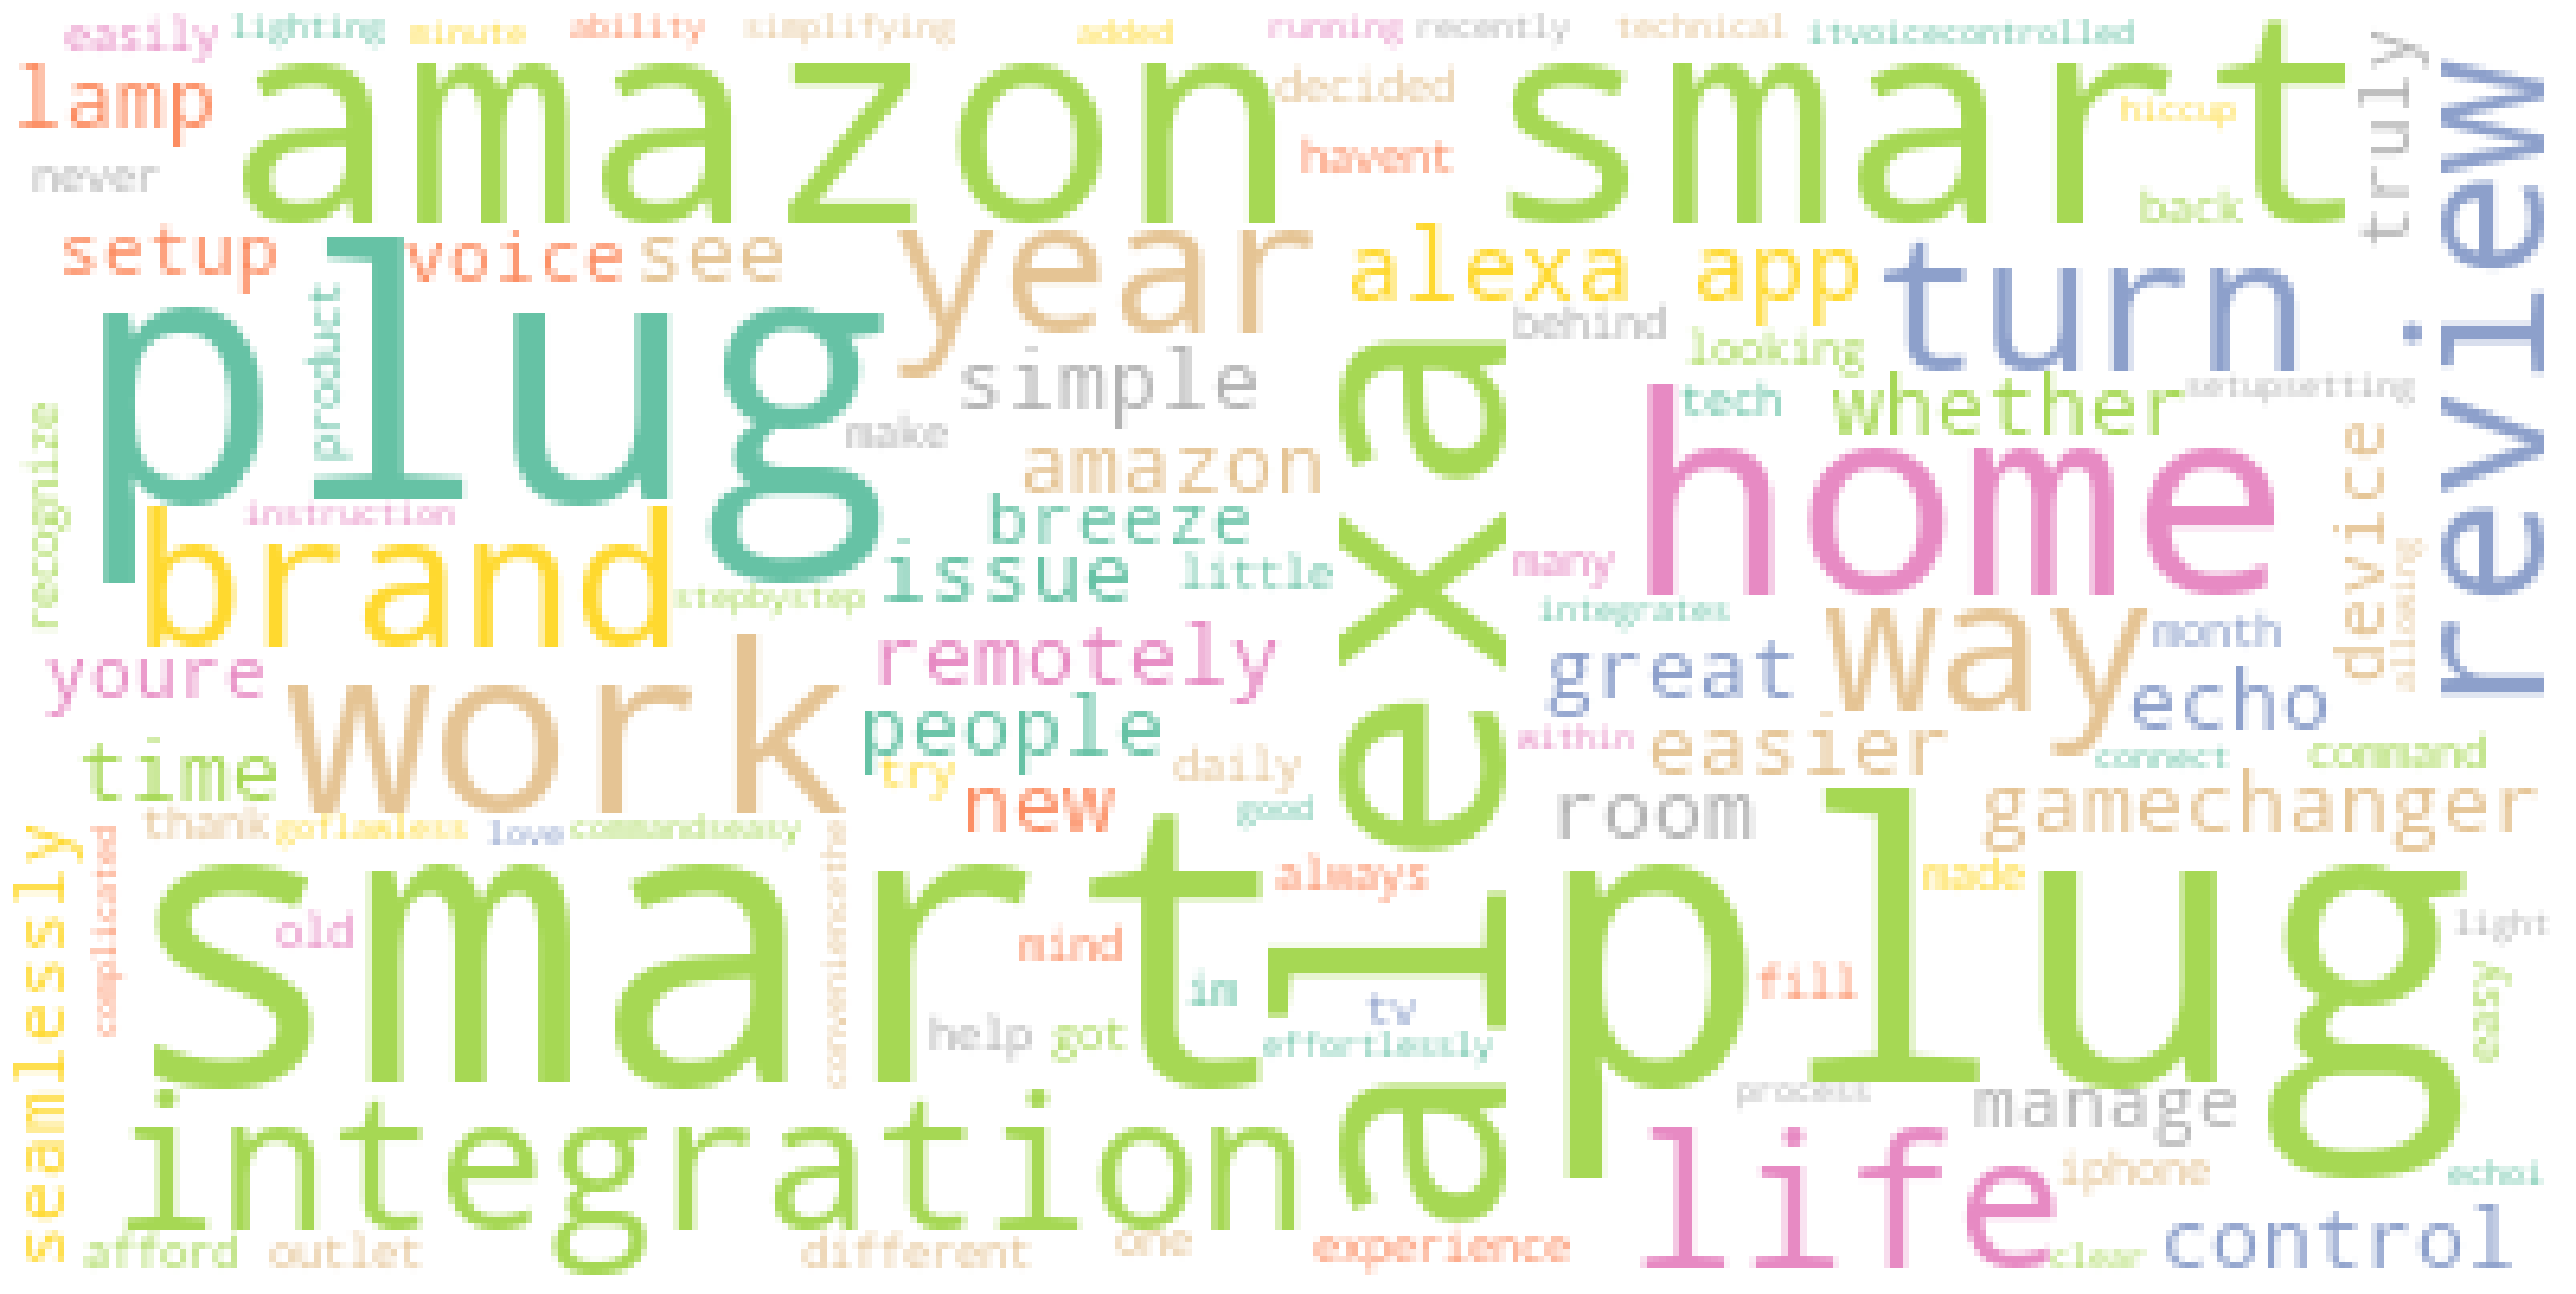

In [86]:
visual(word_cloud)

In [87]:
nlp=spacy.load('en_core_web_sm')
one_block=nlp(clean_review)
two_block=nlp(one_block)
spacy.displacy.render(two_block,style='ent',jupyter=True)

## sentimental analysis 

In [88]:
non_verbs=[x.text for x in two_block if x.pos_ in ('NOUN','VERB')]
non_verbs

['added',
 'home',
 'gamechanger',
 'simplifying',
 'home',
 'setup',
 'love',
 'itvoicecontrolled',
 'ability',
 'control',
 'voice',
 'gamechanger',
 'integrates',
 'allowing',
 'manage',
 'home',
 'lighting',
 'voice',
 'commandseasy',
 'setupsetting',
 'stepbystep',
 'instruction',
 'running',
 'minute',
 'complicated',
 'process',
 'hiccup',
 'plug',
 'connect',
 're',
 'goflawless',
 'integration',
 'echoi',
 'use',
 'conjunction',
 'integration',
 'flawless',
 'device',
 'work',
 'creating',
 'experience',
 'm',
 'mood',
 'evening',
 'need',
 'workspace',
 'command',
 'alexa',
 'proven',
 'responds',
 'command',
 'experienced',
 'connectivity',
 'issue',
 'addition',
 'home',
 'ecosystem',
 'say',
 'transformed',
 'way',
 'manage',
 'household',
 'contemplating',
 'adding',
 'collection',
 'let',
 'share',
 'experience',
 'purchased',
 'son',
 'room',
 'goal',
 'mind',
 'control',
 'tv',
 'usage',
 'thanks',
 'app',
 'turn',
 'tv',
 'fell',
 'worked',
 'charm',
 'giving',
 'peac

In [89]:
a=count.fit_transform(non_verbs)

In [90]:
sum_a=a.sum(axis=0)

In [91]:
sum_a

matrix([[ 1,  1,  1,  1,  1,  3,  1,  1,  2,  4,  1,  1,  1,  1,  1,  1,
          1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
          2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
          1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,
          2,  1,  1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  4,  1,  2,  1,
          3,  1,  1,  1,  1,  1,  3,  1,  1,  4,  1,  1,  1,  1,  1,  2,
          1,  1,  1,  2,  1,  2,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  3,  1,  1,  1,  1, 15,  1,  1,  1,  1,  2,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  3,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  2,  1,  4,  1,
          2,  1,  1,  1,  2,  3,  1,  5,  1,  1,  1

In [92]:
sum_a.shape

(1, 220)

In [93]:
count.vocabulary_.items()

dict_items([('added', 2), ('home', 85), ('gamechanger', 75), ('simplifying', 186), ('setup', 182), ('love', 114), ('itvoicecontrolled', 98), ('ability', 0), ('control', 42), ('voice', 212), ('integrates', 91), ('allowing', 6), ('manage', 118), ('lighting', 106), ('commandseasy', 32), ('setupsetting', 183), ('stepbystep', 189), ('instruction', 90), ('running', 172), ('minute', 122), ('complicated', 33), ('process', 154), ('hiccup', 84), ('plug', 150), ('connect', 37), ('re', 161), ('goflawless', 79), ('integration', 92), ('echoi', 53), ('use', 210), ('conjunction', 36), ('flawless', 71), ('device', 50), ('work', 215), ('creating', 46), ('experience', 62), ('mood', 126), ('evening', 59), ('need', 128), ('workspace', 217), ('command', 31), ('alexa', 5), ('proven', 156), ('responds', 168), ('experienced', 63), ('connectivity', 39), ('issue', 96), ('addition', 4), ('ecosystem', 54), ('say', 176), ('transformed', 203), ('way', 213), ('household', 88), ('contemplating', 40), ('adding', 3), ('

In [94]:
for i,j in count.vocabulary_.items():
    print(i,sum_a[0,j])


added 1
home 5
gamechanger 3
simplifying 1
setup 2
love 1
itvoicecontrolled 1
ability 1
control 3
voice 2
integrates 1
allowing 1
manage 2
lighting 1
commandseasy 1
setupsetting 1
stepbystep 1
instruction 1
running 1
minute 1
complicated 1
process 1
hiccup 1
plug 15
connect 1
re 1
goflawless 1
integration 4
echoi 1
use 1
conjunction 1
flawless 1
device 1
work 5
creating 1
experience 2
mood 1
evening 1
need 1
workspace 1
command 2
alexa 3
proven 1
responds 1
experienced 1
connectivity 1
issue 3
addition 1
ecosystem 1
say 1
transformed 1
way 3
household 1
contemplating 1
adding 1
collection 1
let 1
share 1
purchased 1
son 1
room 3
goal 1
mind 2
tv 2
usage 1
thanks 1
app 4
turn 4
fell 1
worked 1
charm 1
giving 1
peace 1
enforce 1
screen 1
time 3
habitsbut 1
stop 1
convenience 1
got 2
thinking 1
possibility 1
decided 2
straightening 1
iron 1
magic 1
continued 1
worry 1
left 1
morning 1
rush 1
allows 1
doublecheck 1
forgetsetting 1
connected 1
encountered 1
routine 1
made 2
life 4
conclusio

In [95]:
word_freq=[(words,sum_a[0,i]) for words,i in count.vocabulary_.items()]
word_freq

[('added', 1),
 ('home', 5),
 ('gamechanger', 3),
 ('simplifying', 1),
 ('setup', 2),
 ('love', 1),
 ('itvoicecontrolled', 1),
 ('ability', 1),
 ('control', 3),
 ('voice', 2),
 ('integrates', 1),
 ('allowing', 1),
 ('manage', 2),
 ('lighting', 1),
 ('commandseasy', 1),
 ('setupsetting', 1),
 ('stepbystep', 1),
 ('instruction', 1),
 ('running', 1),
 ('minute', 1),
 ('complicated', 1),
 ('process', 1),
 ('hiccup', 1),
 ('plug', 15),
 ('connect', 1),
 ('re', 1),
 ('goflawless', 1),
 ('integration', 4),
 ('echoi', 1),
 ('use', 1),
 ('conjunction', 1),
 ('flawless', 1),
 ('device', 1),
 ('work', 5),
 ('creating', 1),
 ('experience', 2),
 ('mood', 1),
 ('evening', 1),
 ('need', 1),
 ('workspace', 1),
 ('command', 2),
 ('alexa', 3),
 ('proven', 1),
 ('responds', 1),
 ('experienced', 1),
 ('connectivity', 1),
 ('issue', 3),
 ('addition', 1),
 ('ecosystem', 1),
 ('say', 1),
 ('transformed', 1),
 ('way', 3),
 ('household', 1),
 ('contemplating', 1),
 ('adding', 1),
 ('collection', 1),
 ('let', 1

In [96]:
#used for sorting the counts
word_freq=sorted(word_freq,reverse=True,key=lambda x:x[1])# key is used to show the reverse is in column index 1 (reverse in count)
word_freq

[('plug', 15),
 ('home', 5),
 ('work', 5),
 ('integration', 4),
 ('app', 4),
 ('turn', 4),
 ('life', 4),
 ('year', 4),
 ('brand', 4),
 ('review', 4),
 ('gamechanger', 3),
 ('control', 3),
 ('alexa', 3),
 ('issue', 3),
 ('way', 3),
 ('room', 3),
 ('time', 3),
 ('people', 3),
 ('see', 3),
 ('lamp', 3),
 ('setup', 2),
 ('voice', 2),
 ('manage', 2),
 ('experience', 2),
 ('command', 2),
 ('mind', 2),
 ('tv', 2),
 ('got', 2),
 ('decided', 2),
 ('made', 2),
 ('looking', 2),
 ('make', 2),
 ('month', 2),
 ('amazon', 2),
 ('iphone', 2),
 ('fill', 2),
 ('try', 2),
 ('product', 2),
 ('added', 1),
 ('simplifying', 1),
 ('love', 1),
 ('itvoicecontrolled', 1),
 ('ability', 1),
 ('integrates', 1),
 ('allowing', 1),
 ('lighting', 1),
 ('commandseasy', 1),
 ('setupsetting', 1),
 ('stepbystep', 1),
 ('instruction', 1),
 ('running', 1),
 ('minute', 1),
 ('complicated', 1),
 ('process', 1),
 ('hiccup', 1),
 ('connect', 1),
 ('re', 1),
 ('goflawless', 1),
 ('echoi', 1),
 ('use', 1),
 ('conjunction', 1),
 ('

In [97]:
word_df=pd.DataFrame(word_freq,columns=['Word','count'])
word_df

Word  count
0           plug     15
1           home      5
2           work      5
3    integration      4
4            app      4
..           ...    ...
215    appliance      1
216          bit      1
217         like      1
218        floor      1
219      planned      1

[220 rows x 2 columns]

In [98]:
word_df[0:10]

Word  count
0         plug     15
1         home      5
2         work      5
3  integration      4
4          app      4
5         turn      4
6         life      4
7         year      4
8        brand      4
9       review      4

<Axes: title={'center': 'most repeated words'}, xlabel='Word'>

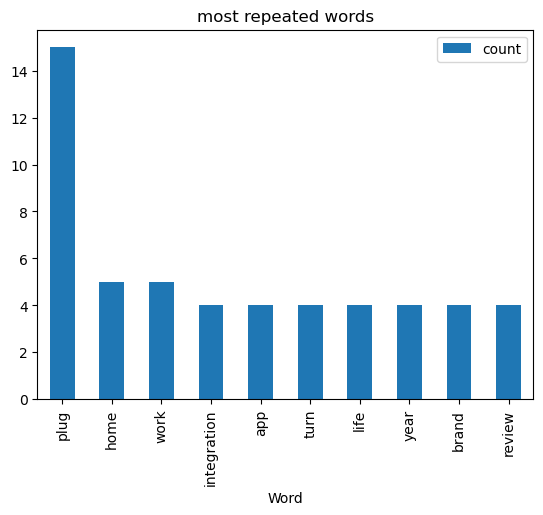

In [99]:
word_df[0:10].plot(kind='bar',y='count',x='Word',title="most repeated words")

In [100]:
affin=pd.read_csv(r'C:\Users\aksha\Downloads\Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [101]:
from nltk import tokenize

In [102]:
sentences =tokenize.sent_tokenize(' '.join(review1))

In [103]:
sentences

["I recently added the Amazon Smart Plug to my home, and it's been a game-changer in simplifying my smart home setup.",
 "Here's why I love it:Voice-Controlled Convenience:The ability to control lights with just my voice is a game-changer.",
 "It integrates seamlessly with Alexa, allowing me to effortlessly manage my home's lighting with simple voice commands.Easy Setup:Setting up the Amazon Smart Plug was a breeze.",
 'The step-by-step instructions were clear, and I had it up and running within minutes.',
 "No complicated processes or technical hiccups – just plug, connect, and you're good to go!Flawless Integration with Echo:I use it in conjunction with my Echo, and the integration is flawless.",
 'The two devices work seamlessly together, creating a truly hands-free experience.',
 "Whether I'm in the mood for a cozy evening or need a well-lit workspace, a simple command to Alexa does the trick.Reliable Performance:The Amazon Smart Plug has proven to be reliable.",
 "It responds prom

In [104]:
sentences_df=pd.DataFrame(sentences,columns=['sentences '])
sentences_df

sentences 
0   I recently added the Amazon Smart Plug to my h...
1   Here's why I love it:Voice-Controlled Convenie...
2   It integrates seamlessly with Alexa, allowing ...
3   The step-by-step instructions were clear, and ...
4   No complicated processes or technical hiccups ...
5   The two devices work seamlessly together, crea...
6   Whether I'm in the mood for a cozy evening or ...
7   It responds promptly to commands, and I haven'...
8   It's a dependable addition to my smart home ec...
9   I have to say, the Amazon Smart Plug has truly...
10  I currently own three of these, and I'm seriou...
11  Let me share my experiences with these fantast...
12  Thanks to the Amazon Smart Plug and the Alexa ...
13  It worked like a charm, giving me peace of min...
14  The sheer convenience of this plug got me thin...
15  I decided to plug in my straightening iron, an...
16  Now, I never have to worry about whether I lef...
17  The Alexa app allows me to double-check and tu...
18  The seamless integration into my daily routine...
19  It's versatile, user-friendly, and has made my...
20  Whether you're a tech enthusiast like me or ju...
21  I highly recommend them to all homeowners look...
22    So I’m kind of new to the amazon device family.
23             We just got our echo a few months ago.
24  I’ve been a prime member for over 10 years so ...
25  I saw the amazon smart plug when I was searchi...
26  It’s been in my cart saved for later for at le...
27  I finally decided to just pre order it so that...
28  For reference I’m an almost 34 year old mom of 2.
29  This means that my 8 year old stole my iPad, i...
30                 So I do everything from my iPhone.
31  I’ve had some weird issues with our echo and m...
32  I received my new amazon smart plug the day it...
33  It was easier than I expected but harder than ...
34                     After that it was very simple.
35  I was able to plug in my baby monitor and then...
36  It is so cool!Future:I think homes will end up...
37  Maybe they already are.Comparing:With so many ...
38                            Too many are 2 for $20.
39  While it’s nice to have the amazon support bac...
40               This smart plug is easy and awesome!
41  But if you’re on a tight budget like I am, I w...
42  I count on others to help me choose the best o...
43  My reviews are always my honest opinion and I ...
44        If you have any questions feel free to ask!
45                                         Thank you!
46  I ordered 6 of these plugs to operate the lamp...
47  I chose them because they advertised that they...
48  OMG after using a really bad product I figured...
49         The setup was so easy and they work GREAT.
50  They are small enough to not block the other o...
51                       I could not be more pleased.
52  I have the plugs operating the nightstand lamp...
53  Now I never have to reach behind furniture to ...
54  Great product if you have Alexa This works gre...
55  The plug itself is a little bit larger than I ...

In [105]:
aff_dict=affin.set_index('word')['value'].to_dict()#converting the data frame to dict
aff_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [106]:
#finding the emotion value
def sentiment_count(text:str):#only accept for strings(words)
  senti_count=0#variable to set count
  if text:#if only the input is string
    sentence=nlp(text)#aplying nlp to text and assign in sentence
    for token in sentence:#token is assign to all the words in sentence
      senti_count+=aff_dict.get(token.lemma_,0)#in aff_dict pick the value and assign to senti_count if the value is not there assign 0)
    return senti_count

In [107]:
sentences_df['sentiment_count']=sentences_df['sentences '].apply(sentiment_count)#applying our function in our dataframe column sentence and by applying this we will et the value count for all the columns

In [108]:
sentences_df

sentences   sentiment_count
0   I recently added the Amazon Smart Plug to my h...                1
1   Here's why I love it:Voice-Controlled Convenie...                5
2   It integrates seamlessly with Alexa, allowing ...                2
3   The step-by-step instructions were clear, and ...                1
4   No complicated processes or technical hiccups ...                2
5   The two devices work seamlessly together, crea...                1
6   Whether I'm in the mood for a cozy evening or ...                0
7   It responds promptly to commands, and I haven'...                0
8   It's a dependable addition to my smart home ec...                1
9   I have to say, the Amazon Smart Plug has truly...                0
10  I currently own three of these, and I'm seriou...                0
11  Let me share my experiences with these fantast...                5
12  Thanks to the Amazon Smart Plug and the Alexa ...                2
13  It worked like a charm, giving me peace of min...               10
14  The sheer convenience of this plug got me thin...                0
15  I decided to plug in my straightening iron, an...                0
16  Now, I never have to worry about whether I lef...               -4
17  The Alexa app allows me to double-check and tu...                3
18  The seamless integration into my daily routine...               -1
19  It's versatile, user-friendly, and has made my...                2
20  Whether you're a tech enthusiast like me or ju...                5
21  I highly recommend them to all homeowners look...                3
22    So I’m kind of new to the amazon device family.                2
23             We just got our echo a few months ago.                0
24  I’ve been a prime member for over 10 years so ...                0
25  I saw the amazon smart plug when I was searchi...                2
26  It’s been in my cart saved for later for at le...                2
27  I finally decided to just pre order it so that...                6
28  For reference I’m an almost 34 year old mom of 2.                0
29  This means that my 8 year old stole my iPad, i...               -2
30                 So I do everything from my iPhone.                0
31  I’ve had some weird issues with our echo and m...               -2
32  I received my new amazon smart plug the day it...                6
33  It was easier than I expected but harder than ...                1
34                     After that it was very simple.                0
35  I was able to plug in my baby monitor and then...                0
36  It is so cool!Future:I think homes will end up...                0
37  Maybe they already are.Comparing:With so many ...                1
38                            Too many are 2 for $20.                0
39  While it’s nice to have the amazon support bac...                5
40               This smart plug is easy and awesome!                6
41  But if you’re on a tight budget like I am, I w...                2
42  I count on others to help me choose the best o...                5
43  My reviews are always my honest opinion and I ...                7
44        If you have any questions feel free to ask!                1
45                                         Thank you!                2
46  I ordered 6 of these plugs to operate the lamp...                0
47  I chose them because they advertised that they...                0
48  OMG after using a really bad product I figured...               -3
49         The setup was so easy and they work GREAT.                1
50  They are small enough to not block the other o...               -1
51                       I could not be more pleased.                3
52  I have the plugs operating the nightstand lamp...                0
53  Now I never have to reach behind furniture to ...               -1
54  Great product if you have Alexa This works gre...                7
55  The plug itself is a little bit larger than I ...              

In [109]:
sentences_df.sort_values(by='sentiment_count')

sentences   sentiment_count
16  Now, I never have to worry about whether I lef...               -4
48  OMG after using a really bad product I figured...               -3
29  This means that my 8 year old stole my iPad, i...               -2
31  I’ve had some weird issues with our echo and m...               -2
53  Now I never have to reach behind furniture to ...               -1
18  The seamless integration into my daily routine...               -1
50  They are small enough to not block the other o...               -1
46  I ordered 6 of these plugs to operate the lamp...                0
24  I’ve been a prime member for over 10 years so ...                0
23             We just got our echo a few months ago.                0
30                 So I do everything from my iPhone.                0
15  I decided to plug in my straightening iron, an...                0
14  The sheer convenience of this plug got me thin...                0
47  I chose them because they advertised that they...                0
52  I have the plugs operating the nightstand lamp...                0
10  I currently own three of these, and I'm seriou...                0
9   I have to say, the Amazon Smart Plug has truly...                0
34                     After that it was very simple.                0
7   It responds promptly to commands, and I haven'...                0
6   Whether I'm in the mood for a cozy evening or ...                0
35  I was able to plug in my baby monitor and then...                0
36  It is so cool!Future:I think homes will end up...                0
38                            Too many are 2 for $20.                0
28  For reference I’m an almost 34 year old mom of 2.                0
33  It was easier than I expected but harder than ...                1
37  Maybe they already are.Comparing:With so many ...                1
0   I recently added the Amazon Smart Plug to my h...                1
49         The setup was so easy and they work GREAT.                1
44        If you have any questions feel free to ask!                1
8   It's a dependable addition to my smart home ec...                1
5   The two devices work seamlessly together, crea...                1
3   The step-by-step instructions were clear, and ...                1
25  I saw the amazon smart plug when I was searchi...                2
22    So I’m kind of new to the amazon device family.                2
19  It's versatile, user-friendly, and has made my...                2
12  Thanks to the Amazon Smart Plug and the Alexa ...                2
4   No complicated processes or technical hiccups ...                2
2   It integrates seamlessly with Alexa, allowing ...                2
45                                         Thank you!                2
26  It’s been in my cart saved for later for at le...                2
41  But if you’re on a tight budget like I am, I w...                2
51                       I could not be more pleased.                3
55  The plug itself is a little bit larger than I ...                3
21  I highly recommend them to all homeowners look...                3
17  The Alexa app allows me to double-check and tu...                3
39  While it’s nice to have the amazon support bac...                5
20  Whether you're a tech enthusiast like me or ju...                5
11  Let me share my experiences with these fantast...                5
1   Here's why I love it:Voice-Controlled Convenie...                5
42  I count on others to help me choose the best o...                5
40               This smart plug is easy and awesome!                6
32  I received my new amazon smart plug the day it...                6
27  I finally decided to just pre order it so that...                6
43  My reviews are always my honest opinion and I ...                7
54  Great product if you have Alexa This works gre...                7
13  It worked like a charm, giving me peace of min...              

In [110]:
#negative sentiment
negative=sentences_df[sentences_df['sentiment_count']<0]
negative

sentences   sentiment_count
16  Now, I never have to worry about whether I lef...               -4
18  The seamless integration into my daily routine...               -1
29  This means that my 8 year old stole my iPad, i...               -2
31  I’ve had some weird issues with our echo and m...               -2
48  OMG after using a really bad product I figured...               -3
50  They are small enough to not block the other o...               -1
53  Now I never have to reach behind furniture to ...               -1

In [111]:
#positive sentiment
negative=sentences_df[sentences_df['sentiment_count']>0]
negative

sentences   sentiment_count
0   I recently added the Amazon Smart Plug to my h...                1
1   Here's why I love it:Voice-Controlled Convenie...                5
2   It integrates seamlessly with Alexa, allowing ...                2
3   The step-by-step instructions were clear, and ...                1
4   No complicated processes or technical hiccups ...                2
5   The two devices work seamlessly together, crea...                1
8   It's a dependable addition to my smart home ec...                1
11  Let me share my experiences with these fantast...                5
12  Thanks to the Amazon Smart Plug and the Alexa ...                2
13  It worked like a charm, giving me peace of min...               10
17  The Alexa app allows me to double-check and tu...                3
19  It's versatile, user-friendly, and has made my...                2
20  Whether you're a tech enthusiast like me or ju...                5
21  I highly recommend them to all homeowners look...                3
22    So I’m kind of new to the amazon device family.                2
25  I saw the amazon smart plug when I was searchi...                2
26  It’s been in my cart saved for later for at le...                2
27  I finally decided to just pre order it so that...                6
32  I received my new amazon smart plug the day it...                6
33  It was easier than I expected but harder than ...                1
37  Maybe they already are.Comparing:With so many ...                1
39  While it’s nice to have the amazon support bac...                5
40               This smart plug is easy and awesome!                6
41  But if you’re on a tight budget like I am, I w...                2
42  I count on others to help me choose the best o...                5
43  My reviews are always my honest opinion and I ...                7
44        If you have any questions feel free to ask!                1
45                                         Thank you!                2
49         The setup was so easy and they work GREAT.                1
51                       I could not be more pleased.                3
54  Great product if you have Alexa This works gre...                7
55  The plug itself is a little bit larger than I ...                3

In [112]:
sentences_df['index']=range(0,len(sentences_df))
sentences_df

sentences   sentiment_count  index
0   I recently added the Amazon Smart Plug to my h...                1      0
1   Here's why I love it:Voice-Controlled Convenie...                5      1
2   It integrates seamlessly with Alexa, allowing ...                2      2
3   The step-by-step instructions were clear, and ...                1      3
4   No complicated processes or technical hiccups ...                2      4
5   The two devices work seamlessly together, crea...                1      5
6   Whether I'm in the mood for a cozy evening or ...                0      6
7   It responds promptly to commands, and I haven'...                0      7
8   It's a dependable addition to my smart home ec...                1      8
9   I have to say, the Amazon Smart Plug has truly...                0      9
10  I currently own three of these, and I'm seriou...                0     10
11  Let me share my experiences with these fantast...                5     11
12  Thanks to the Amazon Smart Plug and the Alexa ...                2     12
13  It worked like a charm, giving me peace of min...               10     13
14  The sheer convenience of this plug got me thin...                0     14
15  I decided to plug in my straightening iron, an...                0     15
16  Now, I never have to worry about whether I lef...               -4     16
17  The Alexa app allows me to double-check and tu...                3     17
18  The seamless integration into my daily routine...               -1     18
19  It's versatile, user-friendly, and has made my...                2     19
20  Whether you're a tech enthusiast like me or ju...                5     20
21  I highly recommend them to all homeowners look...                3     21
22    So I’m kind of new to the amazon device family.                2     22
23             We just got our echo a few months ago.                0     23
24  I’ve been a prime member for over 10 years so ...                0     24
25  I saw the amazon smart plug when I was searchi...                2     25
26  It’s been in my cart saved for later for at le...                2     26
27  I finally decided to just pre order it so that...                6     27
28  For reference I’m an almost 34 year old mom of 2.                0     28
29  This means that my 8 year old stole my iPad, i...               -2     29
30                 So I do everything from my iPhone.                0     30
31  I’ve had some weird issues with our echo and m...               -2     31
32  I received my new amazon smart plug the day it...                6     32
33  It was easier than I expected but harder than ...                1     33
34                     After that it was very simple.                0     34
35  I was able to plug in my baby monitor and then...                0     35
36  It is so cool!Future:I think homes will end up...                0     36
37  Maybe they already are.Comparing:With so many ...                1     37
38                            Too many are 2 for $20.                0     38
39  While it’s nice to have the amazon support bac...                5     39
40               This smart plug is easy and awesome!                6     40
41  But if you’re on a tight budget like I am, I w...                2     41
42  I count on others to help me choose the best o...                5     42
43  My reviews are always my honest opinion and I ...                7     43
44        If you have any questions feel free to ask!                1     44
45                                         Thank you!                2     45
46  I ordered 6 of these plugs to operate the lamp...                0     46
47  I chose them because they advertised that they...                0     47
48  OMG after using a really bad product I figured...               -3     48
49         The setup was so easy and they work GREAT.                1     49
50  They are small enough to not block the other o...            

C:\Users\aksha\AppData\Local\Temp\ipykernel_18608\2321524516.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentences_df['sentiment_count'])


<Axes: xlabel='sentiment_count', ylabel='Density'>

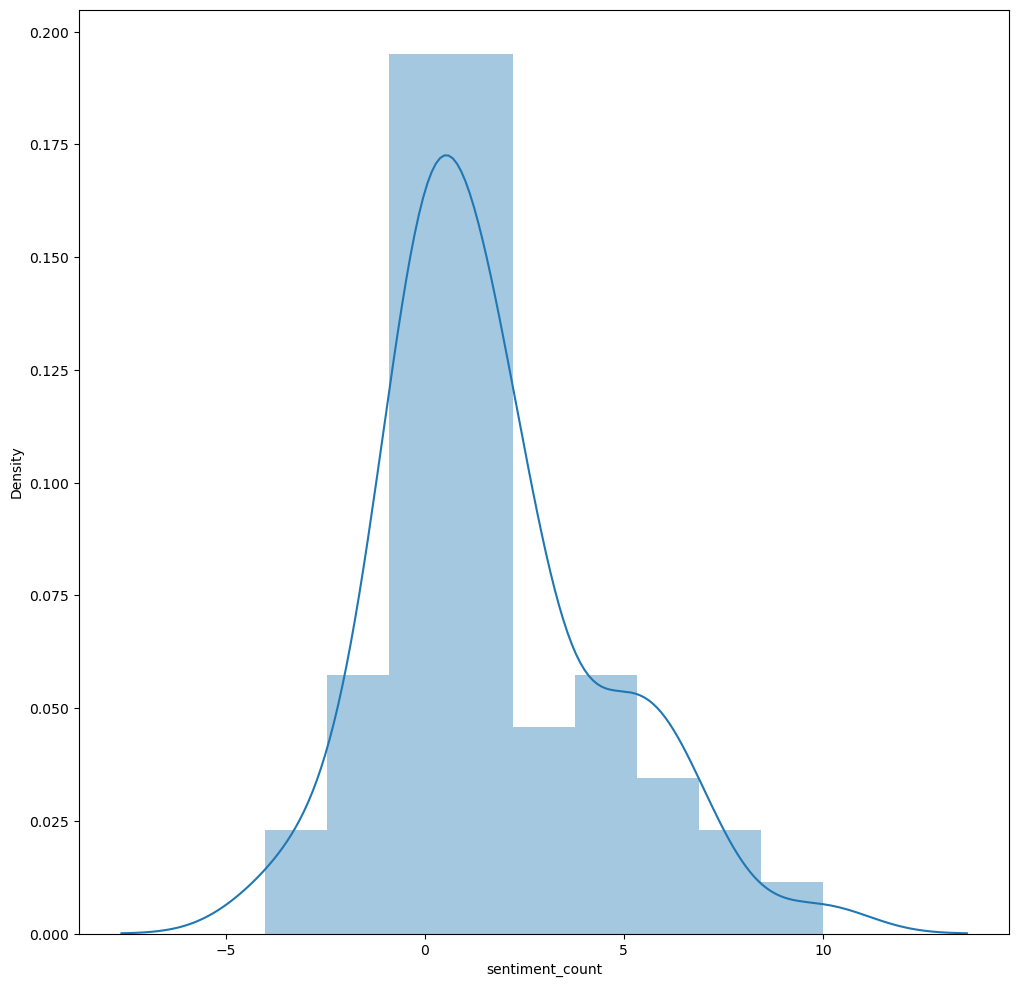

In [113]:
plt.figure(figsize=(12,12))
sns.distplot(sentences_df['sentiment_count'])

<Axes: xlabel='index', ylabel='sentiment_count'>

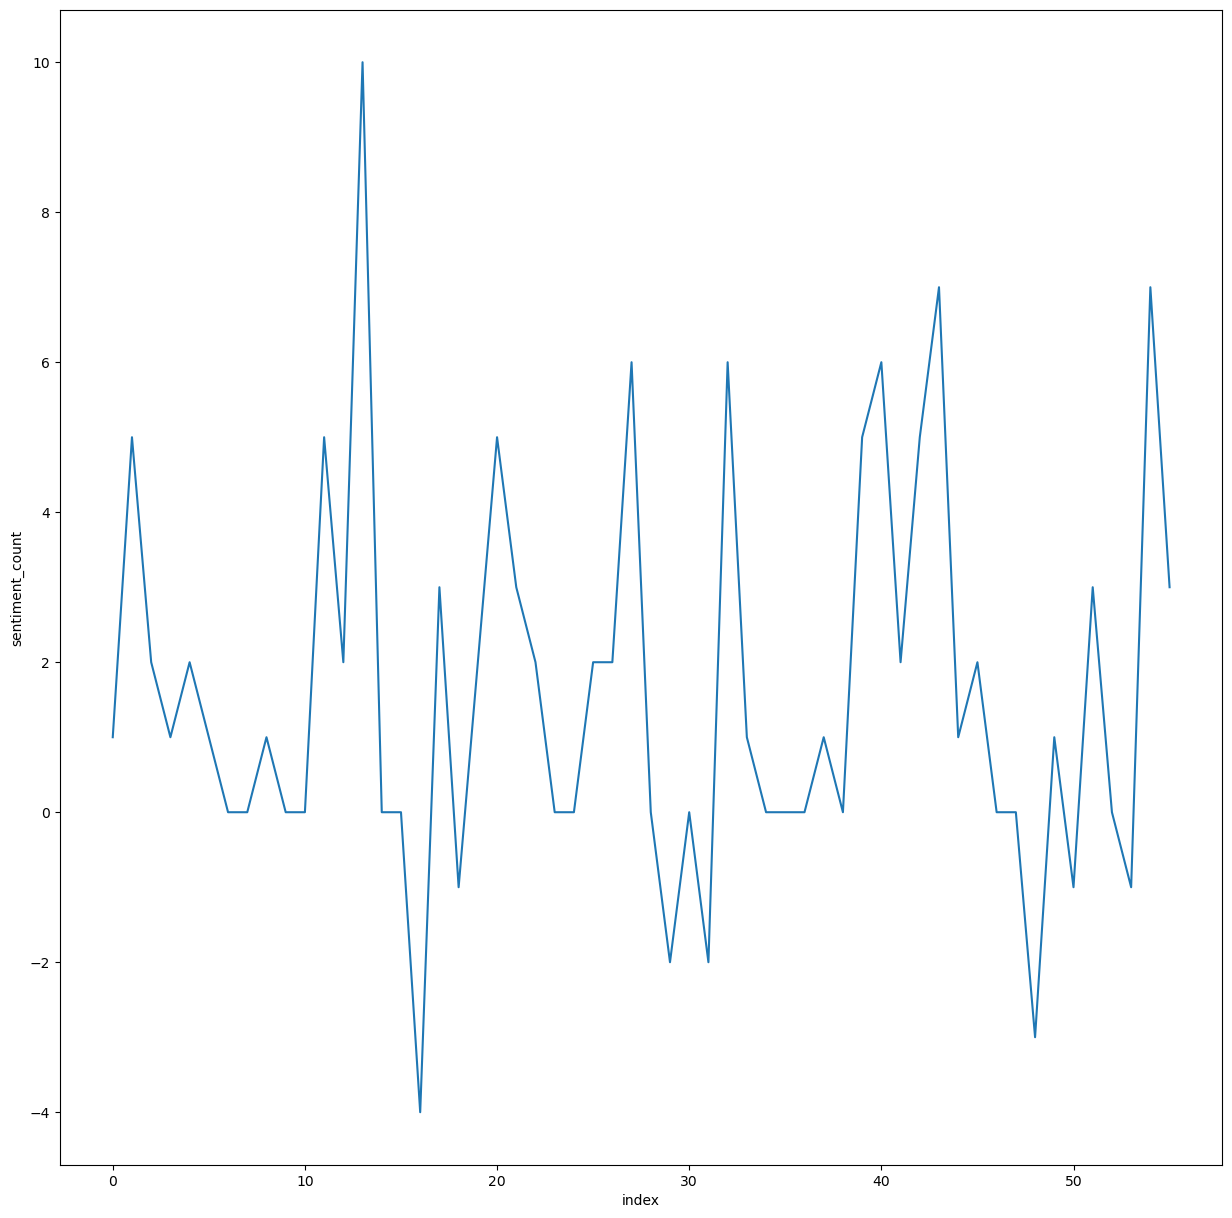

In [114]:
plt.figure(figsize=(15,15))
sns.lineplot(y='sentiment_count',x='index',data=sentences_df)

In [115]:
with open(r"C:\Users\aksha\Downloads\negative-words.txt",encoding="utf8", errors='ignore') as f:
    negative=f.read().split("\n")

In [116]:
negative

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [117]:
negative = negative[35:]

In [118]:
negative

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


## negative reviews

In [119]:
negative_review=[x for x in non_verbs if x in negative]

In [120]:
negative_review

['complicated',
 'issue',
 'fell',
 'worry',
 'issue',
 'fallen',
 'issue',
 'randomly',
 'lose']

In [140]:
with open(r"C:\Users\aksha\Downloads\positive-words (1).txt",errors='ignore',encoding="utf8")as g:
    positive=g.read().split("\n")

In [141]:
positive

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [142]:
positive=positive[35:]
positive

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

## positive reviews

In [143]:
positive_review=[x for x in non_verbs if x in positive ]

In [144]:
positive_review

['simplifying',
 'love',
 'flawless',
 'work',
 'proven',
 'worked',
 'charm',
 'peace',
 'convenience',
 'magic',
 'enthusiast',
 'simplify',
 'recommend',
 'support',
 'work',
 'helped',
 'thank',
 'work',
 'work',
 'pleased',
 'work',
 'like']